📝 Project: Regression on Dynamic Pricing Dataset
In this project, we work with a real-world dataset related to dynamic pricing in ride-hailing services. The dataset captures various customer, location, and ride-related factors. Our goal is to build a complete machine learning pipeline—from data exploration and preprocessing to model development and evaluation—to predict the price of a ride under dynamic conditions.


🎯 Objective
The primary objective is to build and compare multiple regression models to accurately predict the dynamic price of rides. This prediction helps ride-hailing platforms optimize their pricing strategy, balance supply-demand, and improve revenue management.

🤖 Models Evaluated
- MultiLinear Regression

- Polynomial Regression

- Support Vector Regression (SVR)

- Random Forest Regressor

- Tuned Random Forest Regressor

- XGBoost Regressor

Evaluation Metrics
To assess model performance, the following regression metrics are used:

- MAE (Mean Absolute Error)

- MSE (Mean Squared Error)

- RMSE (Root Mean Squared Error)

These metrics help evaluate the accuracy and consistency of the models in predicting continuous values.

Outcome
- By comparing the above models using regression metrics, we aim to:

- Identify the most effective model for dynamic pricing prediction

- Gain insights into which features influence ride cost the most

- Enable data-driven pricing strategies to improve business profitability and user satisfaction

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/Users/pravaliparvataneni/Desktop/sudents and projects/S1/Regression/dynamic_pricing.csv")

In [3]:
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [4]:
data.isna().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


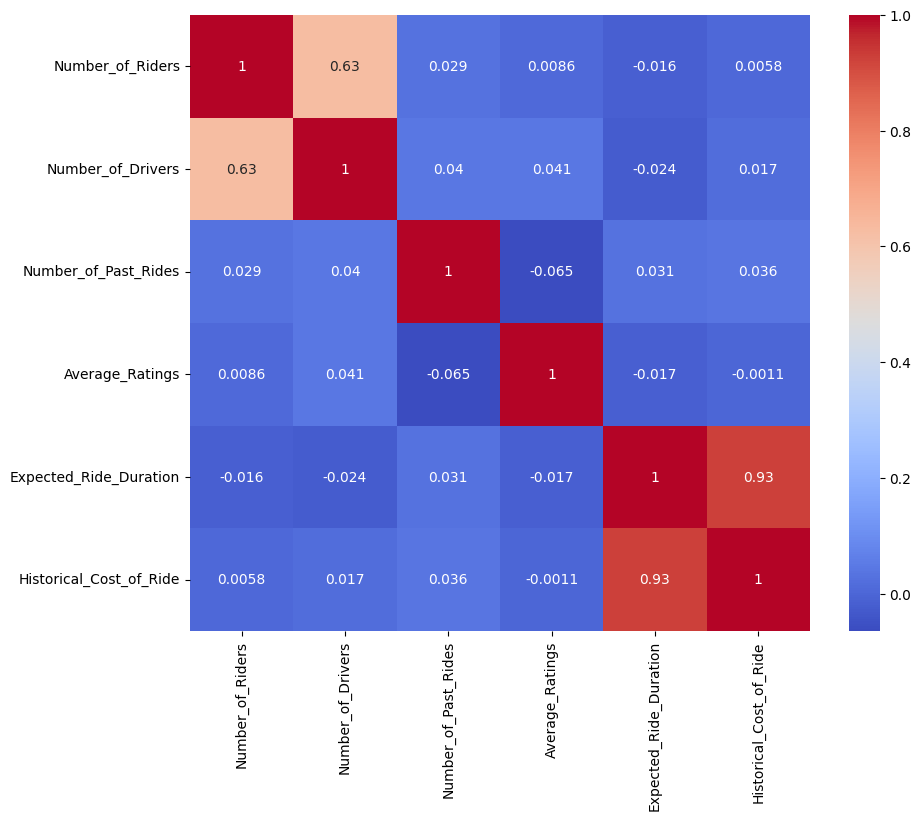

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_df = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


- Historical cost of ride and Expected ride duration are more positively co-related.
- Historical cost of ride and Number of riders are almost not co-related

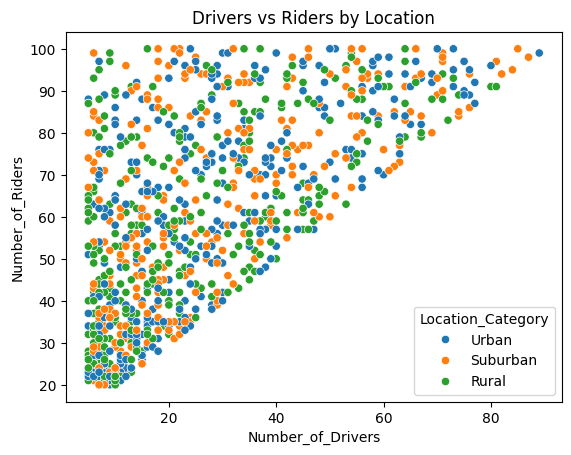

In [7]:
sns.scatterplot(x='Number_of_Drivers', y='Number_of_Riders', hue='Location_Category', data=data)
plt.title('Drivers vs Riders by Location')
plt.show()

- There is a strong positive correlation between the number of drivers and riders across all location categories
- Urban areas tend to have more demand for rides, followed by Suburban and then rural areas
- The demand for rides decreases as you move on from urban to rural areas.

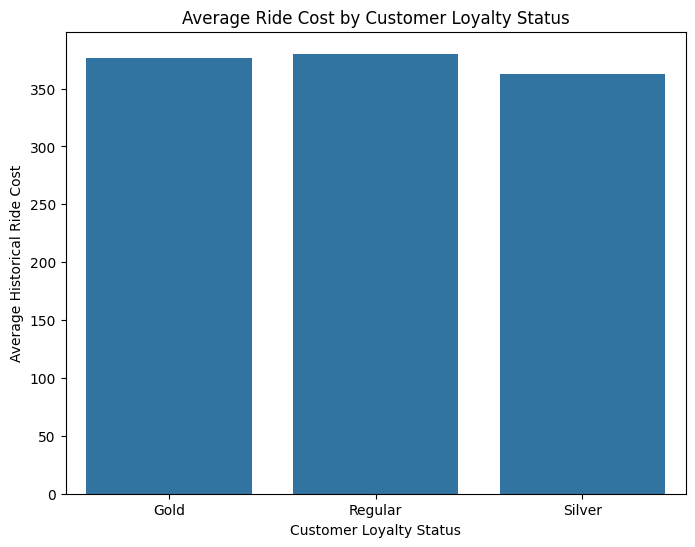

In [8]:
loyalty_cost = data.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].mean().reset_index()

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x='Customer_Loyalty_Status', y='Historical_Cost_of_Ride', data=loyalty_cost)
plt.title('Average Ride Cost by Customer Loyalty Status')
plt.ylabel('Average Historical Ride Cost')
plt.xlabel('Customer Loyalty Status')
plt.show()

There was slight high ride cost for the customer who belongs to Regular Loyalty Status, Almost cost is similar for any royalty status.

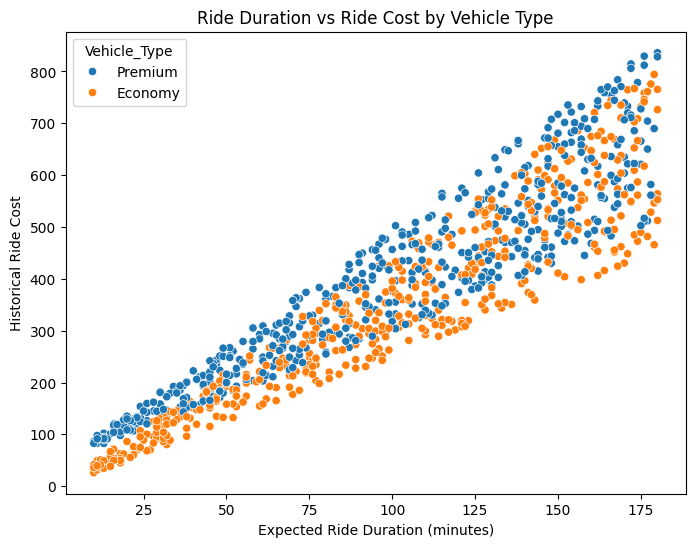

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Expected_Ride_Duration', y='Historical_Cost_of_Ride', hue='Vehicle_Type', data=data)
plt.title('Ride Duration vs Ride Cost by Vehicle Type')
plt.xlabel('Expected Ride Duration (minutes)')
plt.ylabel('Historical Ride Cost')
plt.show()

- As the ride duration increases the ride cost increases
- There is a high ride cost for premium vehicle type compared to Economy.

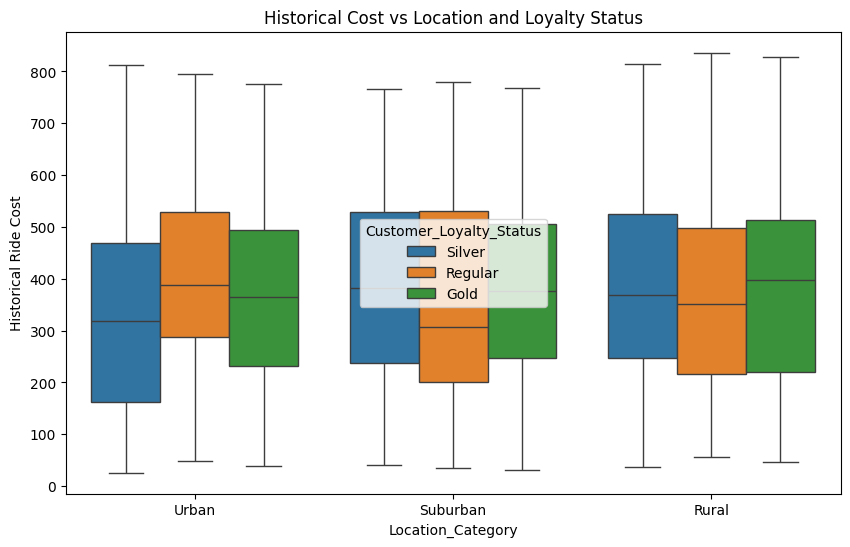

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location_Category', y='Historical_Cost_of_Ride', hue='Customer_Loyalty_Status', data=data)
plt.title('Historical Cost vs Location and Loyalty Status')
plt.ylabel('Historical Ride Cost')
plt.show()

- Customer with loyalty status silver belonging to SubUrban Loaction has high cost ride compared to anyother locations.
- Customer with loyalty status Regular belonging to Urban Loaction has high cost ride compared to anyother locations.
- Customer with loyalty status Gold belonging to Rural Loaction has high cost ride compared to anyother locations.

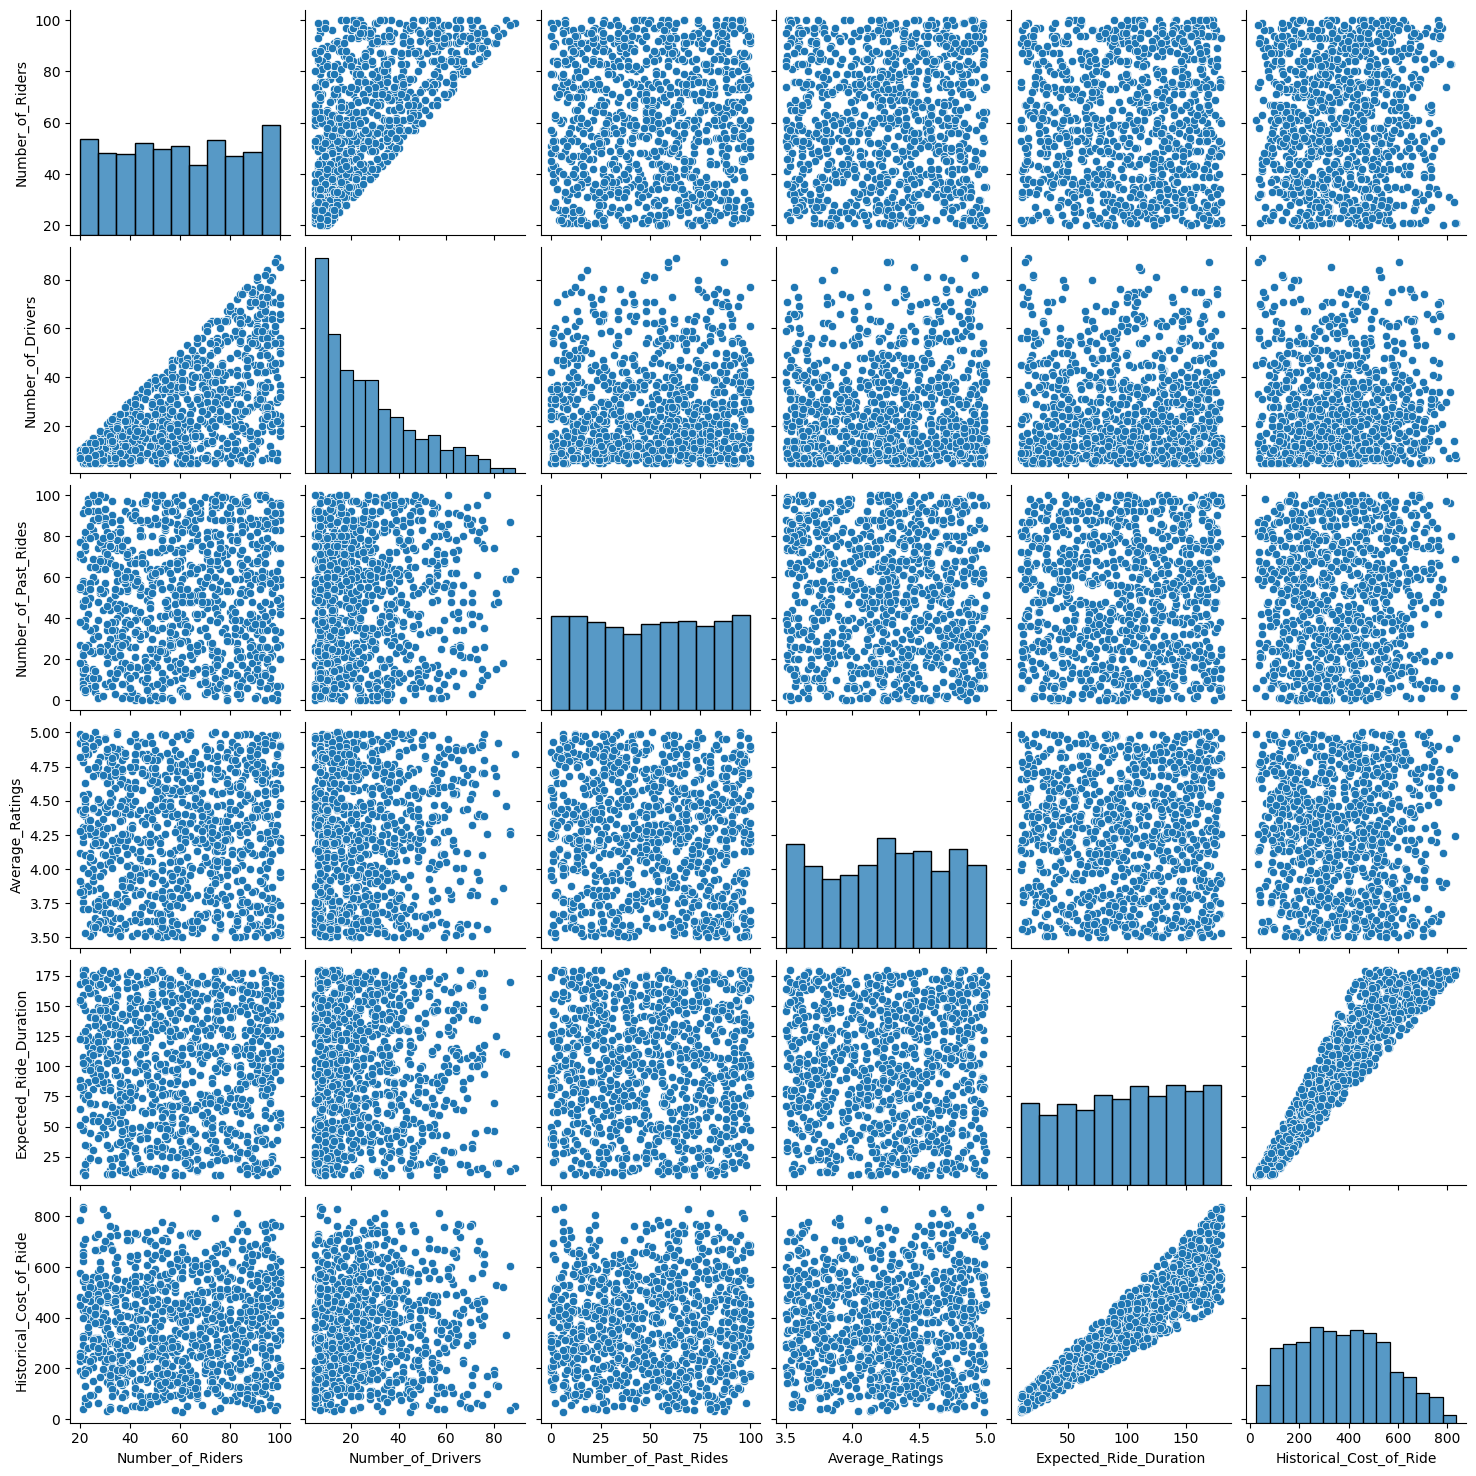

In [11]:
sns.pairplot(data)

In [12]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
for col in label_cols:
    data[col] = LabelEncoder().fit_transform(data[col])


In [13]:
data

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,2,2,13,4.47,3,1,90,284.257273
1,58,39,1,2,72,4.06,1,0,43,173.874753
2,42,31,0,2,0,3.99,0,1,76,329.795469
3,89,28,0,1,67,4.31,0,1,134,470.201232
4,78,22,0,1,74,3.77,0,0,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,2,0,24,4.21,2,1,11,91.389526
996,84,29,2,1,92,4.55,2,1,94,424.155987
997,44,6,1,0,80,4.13,3,1,40,157.364830
998,53,27,1,1,78,3.63,3,1,58,279.095048


In [14]:
data['Historical_Cost_of_Ride'].describe()

count    1000.000000
mean      372.502623
std       187.158756
min        25.993449
25%       221.365202
50%       362.019426
75%       510.497504
max       836.116419
Name: Historical_Cost_of_Ride, dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop('Historical_Cost_of_Ride', axis=1)
y = data['Historical_Cost_of_Ride']

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Multilinear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [18]:
print(lr_model.score(X_train,y_train))
print(lr_model.score(X_test,y_test))

0.8770590099919289
0.8745487387599428


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred_lr)
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred_lr)
RMSE = np.sqrt(MSE)

In [20]:
# Print the results

print("🔹 Multiple Linear Regression")
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)

🔹 Multiple Linear Regression
Mean Absolute Error (MAE): 52.724635154956246
Mean Squared Error (MSE): 4574.053712786409
Root Mean Squared Error (RMSE): 67.63175077422149


# Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Train-test split on polynomial features
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)
y_pred_poly = poly_model.predict(X_test_p)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_true=y_test_p, y_pred=y_pred_poly)
MSE = mean_squared_error(y_true=y_test_p, y_pred=y_pred_poly)
RMSE = np.sqrt(MSE)

In [23]:
print("\n🔹 Polynomial Regression (Degree=2)")
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)


🔹 Polynomial Regression (Degree=2)
Mean Absolute Error (MAE): 54.1395218228384
Mean Squared Error (MSE): 4974.763886643555
Root Mean Squared Error (RMSE): 70.53200611526341


# SVR

In [24]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred_svr)
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred_svr)
RMSE = np.sqrt(MSE)

In [26]:
print("\n🔹 Support Vector Regression (Degree=2)")
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)


🔹 Support Vector Regression (Degree=2)
Mean Absolute Error (MAE): 142.7977504789542
Mean Squared Error (MSE): 29484.308376768186
Root Mean Squared Error (RMSE): 171.70995421573028


# Hyperparameter tuning with GridSearchCV

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create base model
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all processors
    verbose=2
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters
print("✅ Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n📊 Tuned Random Forest Regression")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

📊 Tuned Random Forest Regression
MAE  : 54.33
RMSE : 72.33


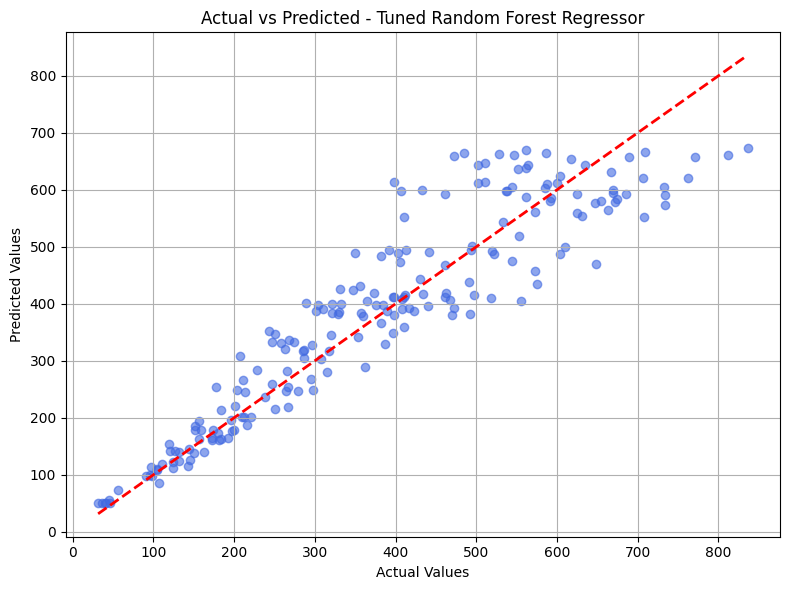

In [28]:
import matplotlib.pyplot as plt

# Predict using best model from GridSearchCV
y_pred_best = best_model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # reference line y=x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Tuned Random Forest Regressor")
plt.grid(True)
plt.tight_layout()
plt.show()


# RandomForest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred_rf)
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred_rf)
RMSE = np.sqrt(MSE)

In [31]:
print("\n🔹 Random Forest Regression")
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)


🔹 Random Forest Regression
Mean Absolute Error (MAE): 55.605595282214864
Mean Squared Error (MSE): 5475.62658246701
Root Mean Squared Error (RMSE): 73.99747686554596


# XGBoost

In [32]:

from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred_xgb)
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred_xgb)
RMSE = np.sqrt(MSE)

In [34]:
print("\n🔹 XGBoost Regression")
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)


🔹 XGBoost Regression
Mean Absolute Error (MAE): 57.48362566091793
Mean Squared Error (MSE): 5830.772495854061
Root Mean Squared Error (RMSE): 76.35949512571479


In [35]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score (Accuracy): {r2:.4f}")


R² Score (Accuracy): 0.8565


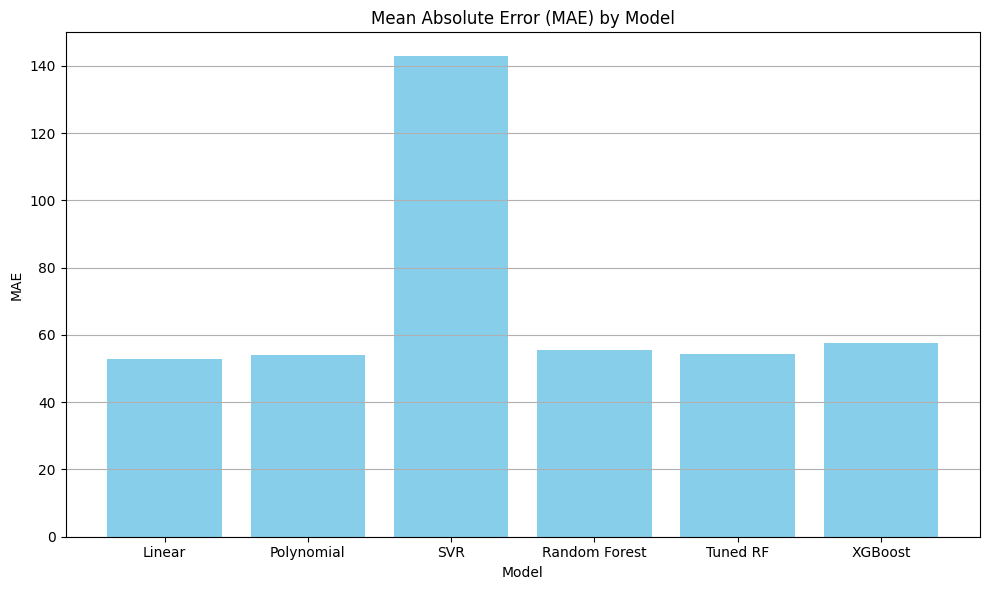

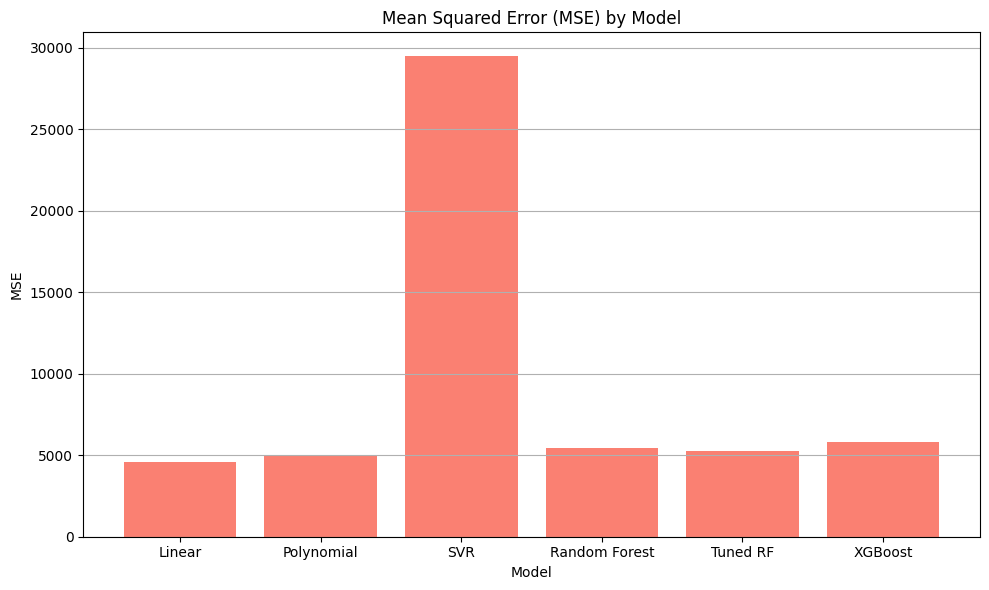

In [36]:
import matplotlib.pyplot as plt

#Store error values for each model
model_names = ['Linear', 'Polynomial','SVR', 'Random Forest', 'Tuned RF', 'XGBoost']

mae_values = [
    mean_absolute_error(y_test, y_pred_lr),      # Linear Regression
    mean_absolute_error(y_test_p, y_pred_poly),  # Polynomial Regression 
    mean_absolute_error(y_test, y_pred_svr),
    mean_absolute_error(y_test, y_pred_rf),      # Random Forest
    mean_absolute_error(y_test, y_pred),         # Tuned Random Forest
    mean_absolute_error(y_test, y_pred_xgb)      # XGBoost
]

mse_values = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test_p, y_pred_poly),
    mean_squared_error(y_test, y_pred_svr),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred),
    mean_squared_error(y_test, y_pred_xgb)
]

# Plot MAE
plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_values, color='skyblue')
plt.title("Mean Absolute Error (MAE) by Model")
plt.ylabel("MAE")
plt.xlabel("Model")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='salmon')
plt.title("Mean Squared Error (MSE) by Model")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The graph suggests that Linear, Polynomial, Tuned RF, and XGBoost are the top-performing models while SVR is the worst-performing model. RandomForest falls somewhere in between.